<a href="https://colab.research.google.com/github/Ryanfs-ng/MachineLearning/blob/main/TrasnferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
(train_ds, val_ds), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    with_info=True,
    as_supervised=True,
)

In [11]:
IMG_SIZE = 160

def format_example(image, label):
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  image = image / 255.0
  return  image, label

train = train_ds.map(format_example).batch(32).prefetch(tf.data.AUTOTUNE)
val = val_ds.map(format_example).batch(32).prefetch(tf.data.AUTOTUNE)

In [8]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid')

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
history = model.fit(train,
                    epochs=5,
                    validation_data=val)

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 530s 898ms/step - accuracy: 0.9405 - loss: 0.1535 - val_accuracy: 0.9794 - val_loss: 0.0601
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 542s 932ms/step - accuracy: 0.9800 - loss: 0.0578 - val_accuracy: 0.9815 - val_loss: 0.0566
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 500s 825ms/step - accuracy: 0.9820 - loss: 0.0513 - val_accuracy: 0.9815 - val_loss: 0.0564
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 542s 893ms/step - accuracy: 0.9838 - loss: 0.0470 - val_accuracy: 0.9817 - val_loss: 0.0577
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 469s 805ms/step - accuracy: 0.9845 - loss: 0.0444 - val_accuracy: 0.9811 - val_loss: 0.0579


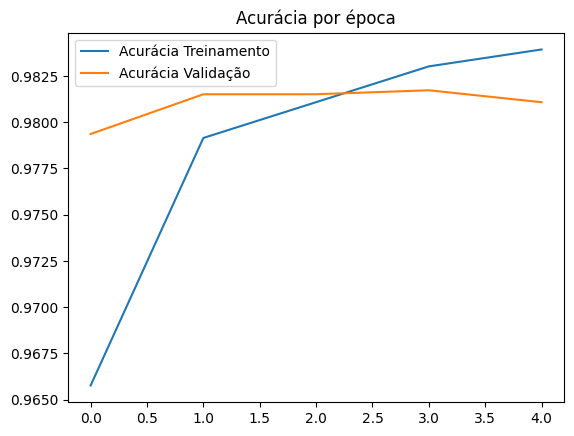

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, label='Acurácia Treinamento')
plt.plot(val_acc, label = 'Acurácia Validação')
plt.legend()
plt.title('Acurácia por época')
plt.show()

In [16]:
model.save("cats_vs_dogs_transfer_learning_model.keras")